In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR # С - классификация, R - регрессия

**Задача об определение подлинности марки винной продукции**


**Формулировка:  можно ли с помощью химического состава определить, подлинное ли вино?**

Legit - подлинник,
Fraud - подделка

Существуют различные показатели кислот, остаточного сахара, хлорида, плотности и т.д.

In [201]:
df = pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [202]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Посмотрим, сколько всего подлинников и сколько подделок

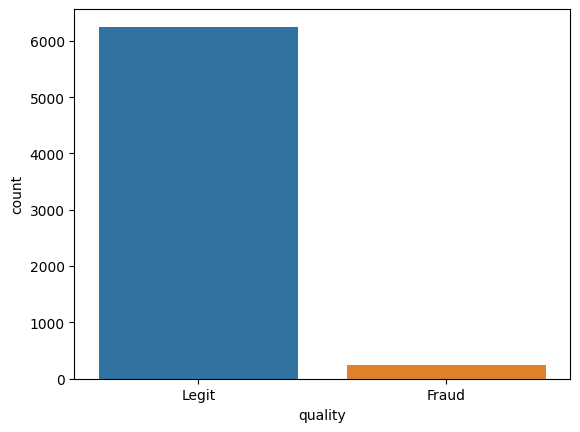

In [203]:
sns.countplot(data=df, x='quality', hue='quality');

In [204]:
df1 = df.groupby(by='quality').agg({'quality':'count'}).rename(columns={'quality':'value'})
print('Процент подделок, которые определили по внешнему виду:', round(df1.value['Fraud']/df1.value['Legit']*100,2))

Процент подделок, которые определили по внешнему виду: 3.94


Следующий график показывает соотношение подделок и подлинников в зависимости типа вина:

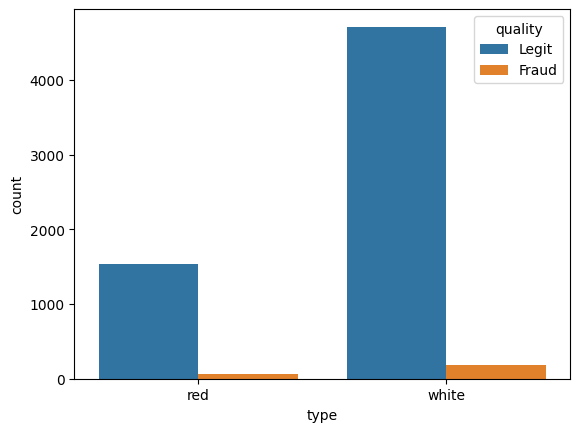

In [205]:
sns.countplot(data=df, x='type', hue='quality');

In [206]:
df2 = df.groupby(by=['type','quality']).aggregate({'quality':'count'}).rename(columns={'quality':'value'})
df2

value
type  quality       
red   Fraud       63
      Legit     1536
white Fraud      183
      Legit     4715

In [207]:
df2.values

array([[  63],
       [1536],
       [ 183],
       [4715]])

Процент подделок в красном вине

In [208]:
df2.values[0]/(df2.values[1]+df2.values[0])*100

array([3.93996248])

Процент подделок в белом вине

In [209]:
df2.values[2]/(df2.values[3] + df2.values[2])*100

array([3.73621886])

Вычисляется корреляется между признаками и колонкой "quality". 

Сначала преобразуется категориальная переменная quality в целочисленный тип через одноразовое кодирование.

In [210]:
df3 = pd.get_dummies(df.drop('type', axis=1), dtype=int, drop_first=False)

In [211]:
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


<Axes: >

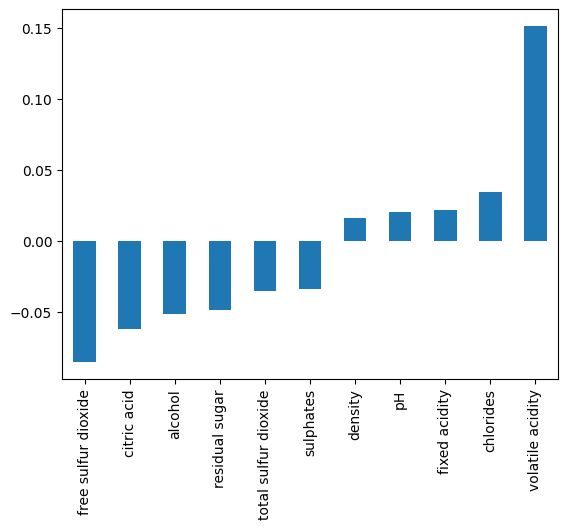

In [212]:
df3.corr()['quality_Fraud'][:-2].sort_values().plot(kind='bar')